<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/reports/3_1_%EC%84%A0%ED%98%95%ED%8C%90%EB%B3%84%ED%95%A8%EC%88%98_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. (50점) 교재 프로그램 6-1을 참고하여, 데이터 HW3Data_1.mat을 이용한 선형판별함수 분류기인 퍼셉트론을 구현하고 새로운 데이터에 대한 분류를 수행하시오.

In [1]:
# !wget https://github.com/SanghunOh/study_machinglearning/blob/main/datas/HW3Data_1.mat

In [2]:
# !ls
!pip install mat73

In [3]:
# read dataset file
import mat73
mat = mat73.loadmat('./HW3Data_1.mat')
# type(mat), mat.keys(),
variables = mat['X']
labels = mat['Y']

import numpy as np
variables.shape, labels.shape, np.unique(labels)

((10, 2), (10,), array([0., 1.]))

In [4]:
# class A, class B 로 분리
class_A_mask = (labels == 0)  # label 0
class_A = variables[class_A_mask]
class_B_mask = (labels == 1)  # label 1
class_B = variables[class_B_mask]

class_A.shape, class_B.shape

((5, 2), (5, 2))

## 데이터 분포 그리기

In [5]:
import matplotlib.pyplot as plt

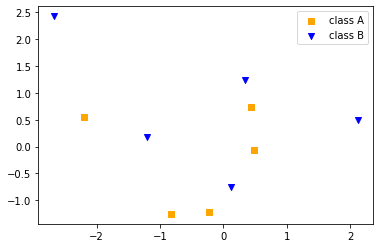

In [6]:
plt.scatter(class_A[:,0],class_A[:,1], marker='s', color='orange', label='class A') # 데이터 A
plt.scatter(class_B[:,0],class_B[:,1], marker='v', color='blue', label='class B')  # 데이터 B
plt.legend()
plt.show()

(1) (30점) [퍼센트론 학습] 제공된 데이터 HW3Data_1.mat을 이용하여 입력 노드 2개와 출 력 노드 1개로 구성된 퍼셉트론을 학습하시오. 이때 최대 반복횟수는 5회로 설정하시오. 이때 학습과정에서 각 반복에 따른 결정 경계를 추적하여 이를 관찰하시오. (파라미터의 초기 값에 따라 그림이 달라질 수 있음. 마지막 step의 결정경계는 초록색으로 할 것.)

#Perceptron

## 학습하기
$
w_i^{τ+1}=w_i^{(τ)}+η(t_i-y_i)x , w_{i0}^{τ+1}=w_{i0}^{(τ)}+η(t_i-y_i)x
$

In [7]:
# 입출력 차원
input_dim = 2
output_dim = 1

# 파라미터 초기화
weight=np.random.rand(input_dim,1)*0.3+0.1
weight0=np.random.rand(1)*0.3+0.1
weight, weight0

(array([[0.19539685],
        [0.14175819]]), array([0.27848365]))

In [8]:
# merge data
train_data = np.vstack([class_A,class_B])

# 선형 선 그리기 위한 데이터 생성
train_dataX_min, train_dataX_max = np.min(train_data[:,0],0), np.max(train_data[:,0],0)
import math
# math.floor(train_dataX_min), math.ceil(train_dataX_max), 
x_values = np.arange(math.floor(train_dataX_min), math.ceil(train_dataX_max))
x_values, #np.info(x_values)

(array([-3, -2, -1,  0,  1,  2]),)

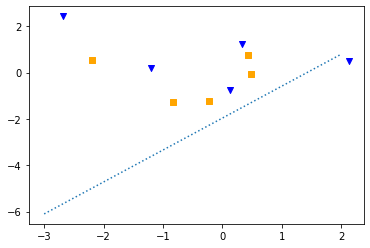

In [9]:
plt.scatter(class_A[:,0],class_A[:,1], marker='s', color='orange', label='class A') # 데이터 A
plt.scatter(class_B[:,0],class_B[:,1], marker='v', color='blue', label='class B')  # 데이터 B
plt.plot(x_values, (weight[0,0]*x_values-weight0)/weight[1,0], linestyle=':', label='init:{}'.format(0))
# plt.show()

## 결정 결계
$
y_i=step(w_i^Tx+w_{i0}) \\
step(u) = \{
  \begin{array}{cl}
  1 & \text{if }u>0 \\
  0 & otherwise
  \end{array}
$

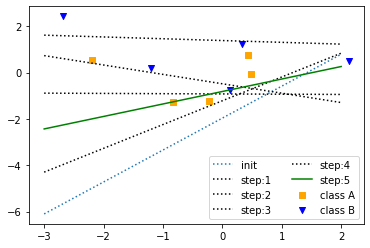

In [10]:
# 학습 횟수
steps = 5
eta = 0.5

train_data = variables
train_label = labels
row_count = train_label.shape[0]

plt.scatter(class_A[:,0],class_A[:,1], marker='s', color='orange', label='class A') # 데이터 A
plt.scatter(class_B[:,0],class_B[:,1], marker='v', color='blue', label='class B')  # 데이터 B
plt.plot(x_values, (weight[0,0]*x_values-weight0)/weight[1,0], linestyle=':', label='init')

linestyle = ':'
linecolor = 'black'
init_weight = weight
init_weight0 = weight0
for j in range(1, steps+1):
  # errors = np.empty([0,1])
  for i in range(row_count):
    x_value, y_label = train_data[i,:], train_label[i]
    # 퍼셉트론 계산
    result = x_value @ weight + weight0
    if (result > 0) :
      y_hat=1
    else :
      y_hat=0
    error = y_label - y_hat
    # errors = np.append(errors,error)
    delta_weight = np.reshape(eta * error * x_value.T, (2,1))
    delta_weight0 = eta * error * 1
    weight = weight + delta_weight
    weight0 = weight0 + delta_weight0
  # x_values가 커서 제한 출력
  y_values = ((weight[0,0]*x_values-weight0)/weight[1,0])

  if j >= (steps) :
    linestyle = '-'
    linecolor = 'green'
  
  plt.plot(x_values, y_values, color=linecolor, linestyle=linestyle, label='step:{}'.format(j))
plt.legend(ncol=2)
plt.show()


(2) (20점) [테스트 데이터 생성 및 분류] 학습이 완료된 후, 다음 데이터를 테스트 데이터로 하여 학습된 퍼셉트론의 파라미터를 사용하여 각 테스트 데이터 입력에 따른 퍼셉트론의 출력값을 계산해 보시오. 그리고 출력값을 기준으로 각 데이터가 어떤 클래스인지를 분류 하시오. (Hint: 1.(2)에서 학습된 퍼셉트론의 파라미터를 사용해야 됨).

## 판별 함수
$
y_i=step(w_i^Tx+w_{i0}) \\
step(u) = \{
  \begin{array}{cl}
  1 & \text{if }u>0 \\
  0 & otherwise
  \end{array}
$

In [12]:
print('init weight : {}, weight0 : {}'.format(init_weight, init_weight0))
print('train weight : {}, weight0 : {}'.format(weight, weight0))

init weight : [[0.19539685]
 [0.14175819]], weight0 : [0.27848365]
train weight : [[0.51340637]
 [0.95330063]], weight0 : [0.77848365]


In [16]:
# 데이터 1: 입력 (5, 3) 
# 데이터 2: 입력 (1, -3) 
# 데이터 3: 입력 (-2, -1) 
# 데이터 4: 입력 (-2, 2)

datas_x = np.array([[5,3],[1,-3],[-2,-1],[-2,2]])
for predict_x in datas_x:
  result = predict_x @ weight + weight0
  if (result > 0) :
    y_hat = 1
  else :
    y_hat = 0
  print('predict x:{}, result:{}, y_hat:{}'.format(predict_x, result, y_hat))


predict x:[5 3], result:[6.20541738], y_hat:1
predict x:[ 1 -3], result:[-1.56801186], y_hat:0
predict x:[-2 -1], result:[-1.20162971], y_hat:0
predict x:[-2  2], result:[1.65827217], y_hat:1
